In [1]:
# imports
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.exceptions import DataConversionWarning, UndefinedMetricWarning, ConvergenceWarning
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize': (15, 10)})
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


# **EDA**


In [2]:
card_df = pd.read_csv('card_transdata.csv')

card_df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
card_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
card_df = card_df.astype({'repeat_retailer': int, 'used_chip': int,
                         'used_pin_number': int, 'online_order': int, 'fraud': int})


In [5]:
card_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [6]:
card_df.min()


distance_from_home                0.004874
distance_from_last_transaction    0.000118
ratio_to_median_purchase_price    0.004399
repeat_retailer                   0.000000
used_chip                         0.000000
used_pin_number                   0.000000
online_order                      0.000000
fraud                             0.000000
dtype: float64

In [7]:
fraud_card_df = card_df[card_df['fraud'] == 1]
not_fraud_card_df = card_df[card_df['fraud'] == 0]

fraud_card_df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1,0,0,1,1
24,3.803057,67.241081,1.872950,1,0,0,1,1
29,15.694986,175.989182,0.855623,1,0,0,1,1
35,26.711462,1.552008,4.603601,1,1,0,1,1
36,10.664474,1.565769,4.886521,1,0,0,1,1


In [32]:
scatter = sns.scatterplot(data=card_df, x='distance_from_last_transaction', y='distance_from_home', hue='fraud')

scatter.set(xscale='log', yscale='log')
plt.title('Effect of Distance from Home and Distance from Last Transaction on Appearance of Fraudulent Transactions')
plt.xlabel('Distance from Last Transaction (Log-Scale)')
plt.ylabel('Distance from Home (Log-Scale)')


In [8]:
fraud_card_df.describe()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


In [9]:
not_fraud_card_df.describe()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


In [10]:
card_df.describe()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
hist = sns.histplot(data=card_df, x='ratio_to_median_purchase_price', hue='fraud')

hist.set(xscale='log')
plt.title('Distribution of Ratio to Median Purchase Price for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Ratio to Median Purchase Price (Log-Scale)')


In [37]:
hist = sns.histplot(data=card_df, x='distance_from_home', hue='fraud')

hist.set(xscale='log', yscale='log')
plt.title('Distribution of Distance from Home Values for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Distance from Home')


# **KNN Classifier**


In [11]:
card_df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [12]:
# downsample card_df
not_fraud = card_df[card_df.fraud == 0]
fraud = card_df[card_df.fraud == 1]

not_fraud = not_fraud.sample(n=5000, random_state=1)
fraud = fraud.sample(n=5000, random_state=1)

card_df_resampled = pd.concat([not_fraud, fraud])

card_df_resampled.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
588980,10.397929,0.196487,1.871035,1,1,0,1,0
944327,2.698401,0.619356,1.364916,1,0,0,1,0
454435,0.970329,16.478552,3.259463,0,1,0,1,0
242702,7.403228,0.044332,4.301315,1,0,0,0,0
26232,4.029468,0.445168,0.348945,1,0,0,1,0


Text(0.5, 1.02, 'Pairplot Between Features in Fraud Dataset')

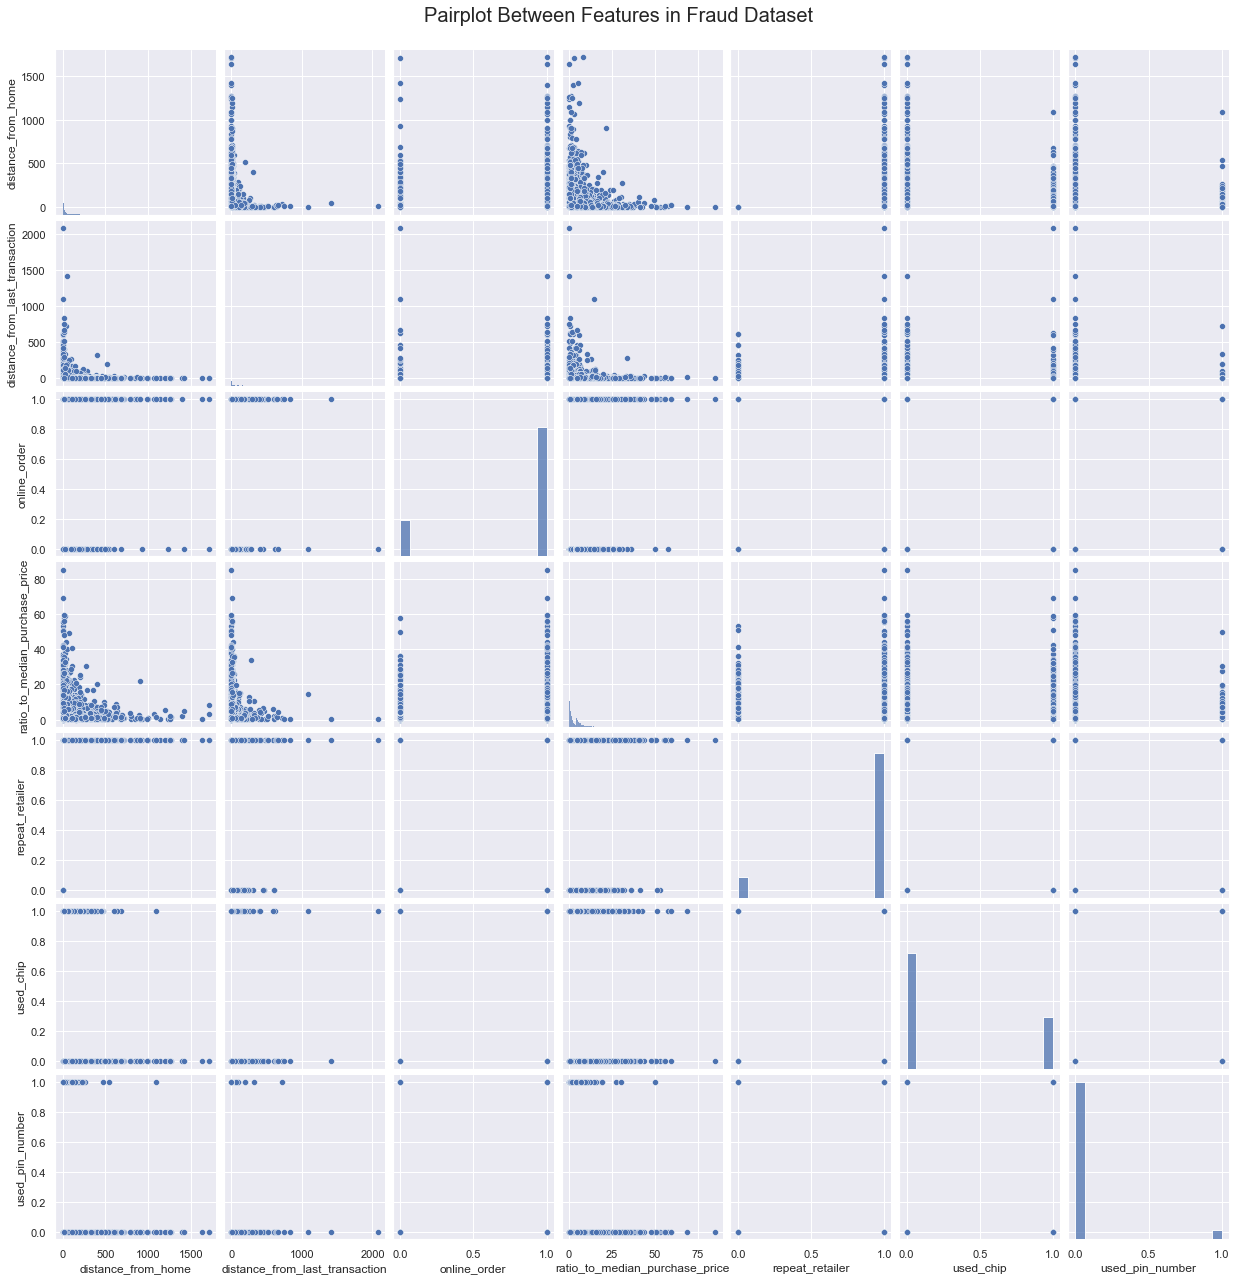

In [13]:
# split X and y
X = card_df_resampled[card_df_resampled.columns.difference(['fraud'])]
y = pd.DataFrame(card_df_resampled['fraud'])

# pairplot
plot = sns.pairplot(X)
plot.fig.suptitle("Pairplot Between Features in Fraud Dataset", y=1.02, size=20)


Text(0.5, 1.0, 'Accuracy of kNN Classifier on Credit Card Fraud Dataset at Various Values of k')

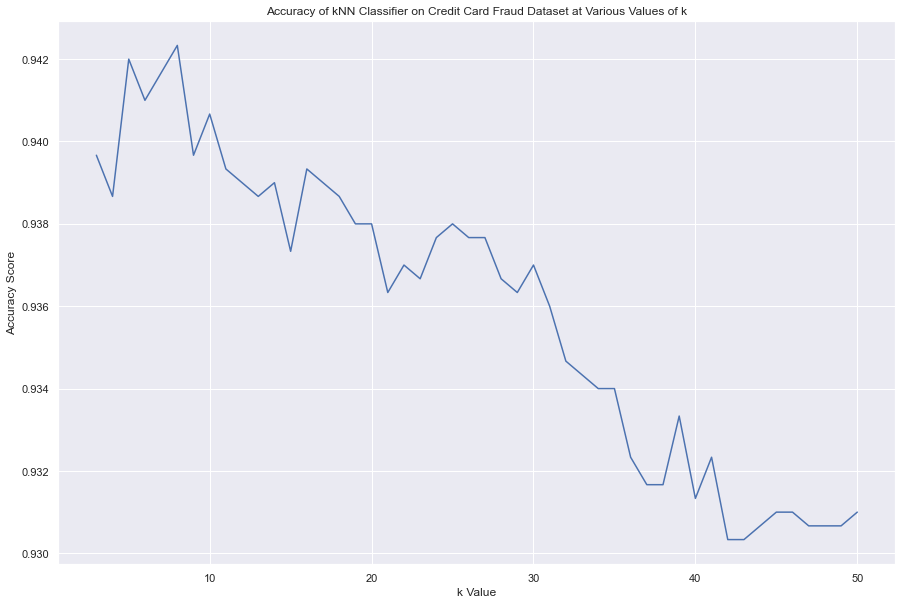

In [14]:
# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=7,
                                                    stratify=y
                                                    )

ks = list(range(3, 51))
accs = []

for k in ks:
    # use random k value and classify
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # append acc to list for plotting
    accs.append(knn.score(X_test, y_test))

sns.lineplot(x=ks, y=accs)
plt.xlabel('k Value')
plt.ylabel('Accuracy Score')
plt.title(
    'Accuracy of kNN Classifier on Credit Card Fraud Dataset at Various Values of k')


In [15]:
# get best k value
max_acc = accs.index(max(accs))

best_k = ks[max_acc]

print(best_k)


8


In [16]:
# predict classification using best_k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1500
           1       0.91      0.99      0.94      1500

    accuracy                           0.94      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.95      0.94      0.94      3000



# **Logistic Regression**


In [17]:
# logistic regression implementation
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.339039
         Iterations 9
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.511    
Dependent Variable:      fraud                 AIC:                   6794.7744
Date:                    2022-06-22 15:33      BIC:                   6845.2467
No. Observations:        10000                 Log-Likelihood:        -3390.4  
Df Model:                6                     LL-Null:               -6931.5  
Df Residuals:            9993                  LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          9.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

Since the p-values for all the features are less than the significance level of 0.05, we can conclude that all features bear significance to the desired predictions.


In [28]:
# create pipeline with preprocessor and SVM
pipeline = Pipeline([
    ('log', LogisticRegression(random_state=15))
])

# create grid of C values and various solvers
param_grid = {
    'log__C': [0.1, 1, 2, 10, 100, 1000, 10000, 100000],
    'log__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# grid search over the parameters
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)

# print the results
print("Best params:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)
print("Score:", grid.best_estimator_.score(X_test, y_test))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'log__C': 0.1, 'log__solver': 'liblinear'}
Best estimator: Pipeline(steps=[('log',
                 LogisticRegression(C=0.1, random_state=15,
                                    solver='liblinear'))])
Score: 0.9333333333333333


In [19]:
# use the best estimator for logistic regression, predict, and get classification report
logreg = LogisticRegression(C=grid.best_params_['log__C'],
                            solver=grid.best_params_['log__solver'])
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1500
           1       0.92      0.95      0.93      1500

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



Text(40.73842500000001, 0.5, 'Mean Test Score')

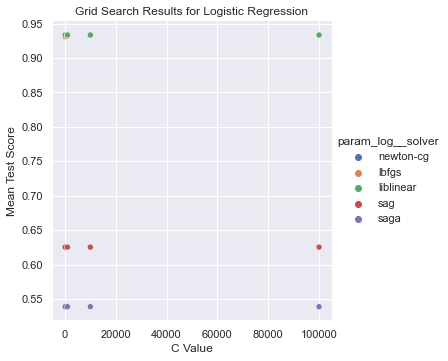

In [43]:
# put grid search results into a dataframe
grid_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

# plot grid search results dataframe using relplot
sns.relplot(x='param_log__C', y='mean_test_score',
            hue='param_log__solver', data=grid_df)
plt.title('Grid Search Results for Logistic Regression')
plt.xlabel('C Value')
plt.ylabel('Mean Test Score')


In [47]:
# logitstic regression with C value of 2 and liblinear solver
logreg = LogisticRegression(C=2, solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1500
           1       0.93      0.95      0.94      1500

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



In [42]:
# logitstic regression with C value of 2100000and lbfgs solver
logreg = LogisticRegression(C=100000, solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1500
           1       0.93      0.96      0.94      1500

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



After hyper-parameter tuning we can see that the `lbfgs` and `liblinear` solvers are nearly identical in terms of recall for fraud predications and overall accuracy. The best solver and C-value are `lbfgs` and `C=100000`, but only beat out `liblinear` slightly.

# **SVM**


In [47]:
# get head of the features matrix
X.head()


,distance_from_home,distance_from_last_transaction,online_order,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number
588980,10.397929,0.196487,1,1.871035,1,1,0
944327,2.698401,0.619356,1,1.364916,1,0,0
454435,0.970329,16.478552,1,3.259463,0,1,0
242702,7.403228,0.044332,0,4.301315,1,0,0
26232,4.029468,0.445168,1,0.348945,1,0,0


In [48]:
# create ColumnTransformer that runs StandardScalar on distance_from_home, distance_from_last_transaction, and ratio_to_median_purchase_price
column_transformer = ColumnTransformer(
    [('scaler', StandardScaler(), ['distance_from_home',
      'distance_from_last_transaction', 'ratio_to_median_purchase_price'])],
    remainder='passthrough'
)

# create pipeline with preprocessor and SVM
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('svm', SVC(random_state=15))
])

# create grid of C values and various kernels
param_grid = {
    'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# grid search over the parameters
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)

# print the results
print("Best params:", grid.best_params_)
print("Best estimator:", grid.best_estimator_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'svm__C': 1000, 'svm__kernel': 'poly'}
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['distance_from_home',
                                                   'distance_from_last_transaction',
                                                   'ratio_to_median_purchase_price'])])),
                ('svm', SVC(C=1000, kernel='poly', random_state=15))])


In [50]:
# run SVM with best C value and kernel
svm = SVC(C=1000, kernel='poly', random_state=15)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.96      0.80      1500
           1       0.93      0.55      0.69      1500

    accuracy                           0.76      3000
   macro avg       0.81      0.76      0.74      3000
weighted avg       0.81      0.76      0.74      3000



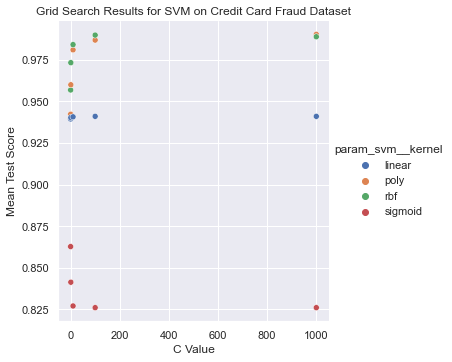

In [52]:
# put grid search results into a dataframe
grid_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

# plot grid search results dataframe using relplot
sns.relplot(x='param_svm__C', y='mean_test_score',
            hue='param_svm__kernel', data=grid_df)
plt.title('Grid Search Results for SVM on Credit Card Fraud Dataset')
plt.xlabel('C Value')
plt.ylabel('Mean Test Score')
plt.show()


Since the `rbf` and `poly` kernels have virtually the same mean test score, we should test our SVC using `rbf` as well because our results from using `poly` are not ideal.


In [53]:
# run SVM with best C value and rbf kernel
svm = SVC(C=1000, kernel='rbf', random_state=15)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1500
           1       0.94      0.99      0.96      1500

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



After hyper-parameter tuning we can see that the best kernel and C-value are `rbf` and `C=1000`, as `rbf` fits our data better than `libnear` because our data may not be linearly separable, as we previously thought.